In [1]:
#Import a plotting libraries and a maths library 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib import animation
%matplotlib inline


In [2]:
def Compute_Forces(pos,epsilon,BoxSize,DIM,N,ene_pot):
    Sij = np.zeros(DIM)
    Rij = np.zeros(DIM)
    acc = np.zeros([N,DIM])
    ene_pot = np.zeros(N)
    bins = np.linspace(0,2*BoxSize,51)
    counts = np.zeros(51)
    for i in range(N-1):
        for j in range(i+1,N):
            Sij = (pos[i,:]-pos[j,:])
            Sij_2 = BoxSize**2*np.dot(Sij,Sij)
            counts[np.digitize(Sij_2,bins)-1] += 1
            
            #Deals with boundary interactions.
            for l in range(DIM):
                if (np.abs(Sij[l])>0.5):
                    Sij[l] = Sij[l]-np.copysign(1,Sij[l])
            
            Rij = BoxSize*Sij
            
            Rsqij = np.dot(Rij,Rij)
            
            if (Rsqij<Rcutoff**2):
                r2 = 1/Rsqij
                r6 = r2**3
                r12 = r6**2
                #Potential Enegy
                phi = 4*epsilon*(r12*sigma**12-r6*sigma**6) - phicutoff
                
                #Force
                dphi = epsilon*24*r2*(2*sigma**12*r12-sigma**6*r6)
                #Update Force
                
                acc[i,:] = acc[i,:]+dphi*Sij
                acc[j,:] = acc[j,:]-dphi*Sij
                
                #Update Potential Energy
                ene_pot[i] = ene_pot[i]+0.5*phi 
                ene_pot[j] = ene_pot[j]+0.5*phi 
    return acc,np.sum(ene_pot)/N,counts          

In [3]:
DIM = 2
nx = 32
N = nx**2
sigma = 0.03
d_perfect = 2**(1/6)*sigma
epsilon = 10

BoxSize = 1
Rcutoff = 2.5*sigma
phicutoff = 4*epsilon*(sigma**12/Rcutoff**12-sigma**6/Rcutoff**6)

vol = BoxSize**DIM

x = np.linspace(0,0.9, nx)

pos = np.zeros([nx**2,DIM])
for i in range(nx):
    for j in range(nx):
        pos[i+nx*j] = [x[i]*BoxSize,x[j]*BoxSize]

In [4]:
Nsteps = 1000
dt = 1/10000
def main(pos,Nsteps,dt,epsilon,BoxSize,DIM):
    #fig = plt.figure(figsize = (4,4), dpi=250)
    #fig2 = plt.figure(figsize = (6,4),dpi=200)
    #ax = plt.axes()
    #ax2 = plt.axes()
    ene_pot = np.zeros(N)
    potential = np.zeros(Nsteps+1)
    _,ene_pot,_ = Compute_Forces(pos,epsilon,BoxSize,DIM,N,ene_pot)
    potential[0] = ene_pot
    #ims = [None for i in range(Nsteps)]
    #ims2 = [None for i in range(Nsteps)]
    vel = (np.random.randn(N,DIM))
    acc = (np.zeros([N,DIM]))
    count = np.zeros(51)
    E = np.zeros(Nsteps+1)
    vel = 0*vel
    E[0] = sum([sum(vel[i,:]**2) for i in range(N)])
    
    for k in range(Nsteps):
       
        #Verlet algorithm
        vel = vel +1/2*dt*acc
        pos = (pos + dt*vel)
        pos = pos%BoxSize
        acc,ene_pot,count = Compute_Forces(pos,epsilon,BoxSize,DIM,N,ene_pot)
        vel = vel + 1/2*dt*acc
        
        #im = ax.scatter(pos[:,0],pos[:,1],color='b',linewidth=4)
        #im2, = ax2.plot(np.sqrt(np.linspace(0,2*BoxSize,51)),count,color='b')
        #title = ax.text(0.15*BoxSize,1.05*BoxSize,"N = {} Radius = {} t = {}".format(N,sigma/2,'%s' % float(str('%s' % float('%.2g' % float(k*dt)))[:4])))
        #ims[k] = [im,title]
        #ims2[k] = [im2,title]
        
        E[k+1] = 1/2*sum([sum(vel[i,:]**2) for i in range(N)])
        potential[k+1] = ene_pot
        
   # plt.grid()
   # plt.xlim([0,1*BoxSize])
   # plt.ylim([0*BoxSize,1*BoxSize])
   # plt.rcParams["animation.html"]= 'html5'
   # ani = animation.ArtistAnimation(fig,ims,interval = 20,blit=True)
   # plt.close
    
    
    # If using Radial density function.
    #plt.grid()
    #plt.xlim([0,np.sqrt(2)*BoxSize])
    #plt.ylim([0*BoxSize,300*BoxSize])
    #plt.title("Radial Density function")
   # plt.ylabel("Count")
    #plt.xlabel("Distance")
    #plt.rcParams["animation.html"]= 'html5'
    #ani2 = animation.ArtistAnimation(fig2,ims2,interval = 20,blit=True)
    #plt.close
    return E/N,potential,count#,ani

In [5]:
a = main(pos,Nsteps,dt,epsilon,BoxSize,DIM)

Text(0.5, 1.0, 'Average Kinetic Energy. 1024 particles, Radius 0.015')

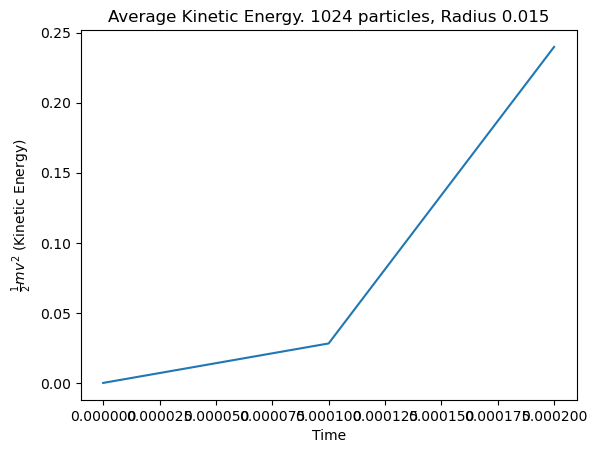

In [6]:
x = np.linspace(0,Nsteps*dt,len(a[0]))
plt.plot(x,a[0])

#plt.ylim([0,10])
plt.xlabel("Time")
plt.ylabel(r"$\frac{1}{2}mv^2$ (Kinetic Energy)")
plt.title("Average Kinetic Energy. {} particles, Radius {}".format(N,sigma/2))
#plt.xlim([0,1])

Text(0.5, 1.0, 'Total Energy. 1024 particles, Radius 0.015')

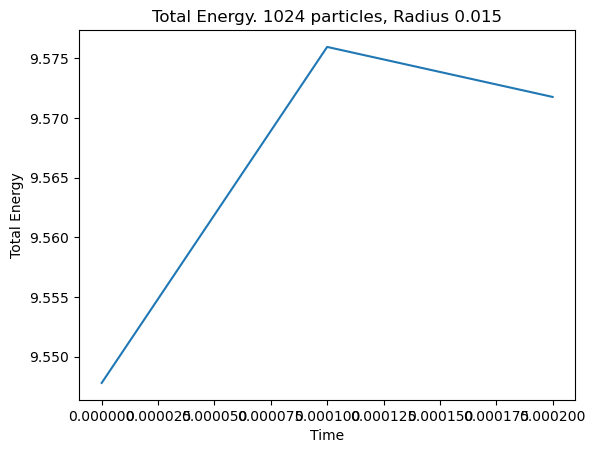

In [7]:
tot_en = a[0]+a[1]
plt.plot(x,tot_en)
#plt.ylim([-1/2,0])
#plt.xlim([0,1])
plt.xlabel("Time")
plt.ylabel("Total Energy")
plt.title("Total Energy. {} particles, Radius {}".format(N,sigma/2))

Text(0.5, 1.0, 'Average Potential Energy. 1024 particles, Radius 0.015')

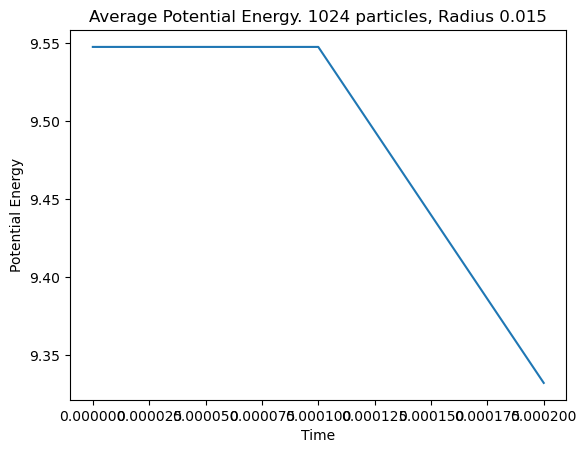

In [8]:
plt.plot(x,a[1])
#plt.xlim([0,1])
#plt.ylim([0,2e2])
plt.xlabel("Time")
plt.ylabel(r"Potential Energy")
plt.title("Average Potential Energy. {} particles, Radius {}".format(N,sigma/2))